In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.utils import plot_model

# Data Loading

In [2]:
df0 = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [3]:
df1 = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')

In [4]:
df2 = pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv')

In [5]:
df3 = pd.read_csv('Monday-WorkingHours.pcap_ISCX.csv')


In [6]:
df4 = pd.read_csv('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')

In [7]:
df5 = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

In [8]:
df6 = pd.read_csv('Tuesday-WorkingHours.pcap_ISCX.csv')

In [9]:
df7 = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')

# Data Pre Processing

In [10]:
df0.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
df0.sum().isna()

 Destination Port              False
 Flow Duration                 False
 Total Fwd Packets             False
 Total Backward Packets        False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
 Idle Std                      False
 Idle Max                      False
 Idle Min                      False
 Label                         False
Length: 79, dtype: bool

In [12]:
df0.sum().isnull()

 Destination Port              False
 Flow Duration                 False
 Total Fwd Packets             False
 Total Backward Packets        False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
 Idle Std                      False
 Idle Max                      False
 Idle Min                      False
 Label                         False
Length: 79, dtype: bool

In [13]:
df1.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.97561,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.97561,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.00000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [14]:
df1.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [15]:
df1.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [16]:
df2.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN


In [17]:
df2.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [18]:
df2.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [19]:
df3.head(3)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [20]:
df3.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
 Idle Std                      1
 Idle Max                      1
 Idle Min                      1
 Label                         1
Length: 79, dtype: int64

In [21]:
df3.dropna(inplace=True)

In [22]:
df3.sum().isna()

 Destination Port              False
 Flow Duration                 False
 Total Fwd Packets             False
 Total Backward Packets        False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
 Idle Std                      False
 Idle Max                      False
 Idle Min                      False
 Label                         False
Length: 79, dtype: bool

In [23]:
df3.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [24]:
df4.head(4)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [25]:
df4.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
 Idle Std                      1
 Idle Max                      1
 Idle Min                      1
 Label                         1
Length: 79, dtype: int64

In [26]:
df4.dropna(inplace=True)

In [27]:
df4.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [28]:
df5.head(4)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32.0,203985.500,5.758373e+05,1629110.0,379.0,13800000.0,4.277541e+06,16500000.0,6737603.0,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32.0,178326.875,5.034269e+05,1424245.0,325.0,13800000.0,4.229413e+06,16500000.0,6945512.0,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0.0,6909777.333,1.170000e+07,20400000.0,6.0,24400000.0,2.430000e+07,60100000.0,5702188.0,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20.0,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,BENIGN


In [29]:
df5.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
 Idle Std                      1
 Idle Max                      1
 Idle Min                      1
 Label                         1
Length: 79, dtype: int64

In [30]:
df5.dropna(inplace=True)

In [31]:
df5.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [32]:
df6.head(4)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [33]:
df6.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
 Idle Std                      1
 Idle Max                      1
 Idle Min                      1
 Label                         1
Length: 79, dtype: int64

In [34]:
df6.dropna(inplace=True)

In [35]:
df5.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [36]:
df7.head(4)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6.0,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,389,479,11,5,172,326,79,0.0,15.636364,31.449238,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,1095,10,6,3150,3150,1575,0.0,315.000000,632.561635,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,389,15206,17,12,3452,6660,1313,0.0,203.058823,425.778474,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [37]:
df7.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
 Idle Std                      1
 Idle Max                      1
 Idle Min                      1
 Label                         1
Length: 79, dtype: int64

In [38]:
df7.dropna(inplace=True)

In [39]:
df7.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

# Data Processing

In [40]:
combined_df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7])

In [41]:
combined_df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [42]:
del df0, df1, df2, df3, df4, df5, df6, df7

In [43]:
combined_df.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [44]:
combined_df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [45]:
combined_df.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                      float64
 Idle Min                      float64
 Label                          object
Length: 79, dtype: object

In [46]:
combined_df.columns = combined_df.columns.str.strip()

In [47]:
combined_df.groupby('Label')

In [48]:
combined_df['Label'].value_counts()

BENIGN                      767780
PortScan                    158930
DDoS                        128027
DoS slowloris                 5796
FTP-Patator                   4078
DoS Slowhttptest              2331
Bot                           1966
Web Attack � Brute Force      1468
Infiltration                    19
Name: Label, dtype: int64

In [49]:
combined_df.shape

(1070395, 79)

# Stratstified Sampling

In [50]:
sample_size = 5000
sampled_df = combined_df.groupby('Label', group_keys=False).apply(lambda x: x.sample(min(len(x), int(sample_size * len(x) / len(combined_df))))).sample(frac=1).reset_index(drop=True)


In [51]:
print(sampled_df['Label'].value_counts())

BENIGN                      3586
PortScan                     742
DDoS                         598
DoS slowloris                 27
FTP-Patator                   19
DoS Slowhttptest              10
Bot                            9
Web Attack � Brute Force       6
Name: Label, dtype: int64


# Encoding cateogarical data

In [52]:
label_encoder = LabelEncoder()
sampled_df['Label'] = label_encoder.fit_transform(sampled_df['Label'])

In [53]:
y = sampled_df['Label']

In [54]:
data = sampled_df.drop(columns=['Label'])

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             4997 non-null   int64  
 1   Flow Duration                4997 non-null   int64  
 2   Total Fwd Packets            4997 non-null   int64  
 3   Total Backward Packets       4997 non-null   int64  
 4   Total Length of Fwd Packets  4997 non-null   int64  
 5   Total Length of Bwd Packets  4997 non-null   int64  
 6   Fwd Packet Length Max        4997 non-null   int64  
 7   Fwd Packet Length Min        4997 non-null   float64
 8   Fwd Packet Length Mean       4997 non-null   float64
 9   Fwd Packet Length Std        4997 non-null   float64
 10  Bwd Packet Length Max        4997 non-null   float64
 11  Bwd Packet Length Min        4997 non-null   float64
 12  Bwd Packet Length Mean       4997 non-null   float64
 13  Bwd Packet Length 

In [56]:
data.shape

(4997, 78)

In [57]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,4997.000000,4.997000e+03,4997.000000,4997.000000,4997.000000,4.997000e+03,4997.000000,4997.000000,4997.000000,4997.000000,...,4997.000000,4997.000000,4.997000e+03,4.997000e+03,4.997000e+03,4.997000e+03,4.997000e+03,4.997000e+03,4.997000e+03,4.997000e+03
mean,7784.819692,1.251202e+07,11.252952,10.977386,609.997599,1.868249e+04,247.725235,19.239944,72.700835,86.655927,...,5.821293,25.419252,1.120706e+05,5.208209e+04,1.991987e+05,8.178435e+04,5.396610e+06,8.998163e+05,6.071717e+06,4.711568e+06
std,17471.210859,3.063567e+07,350.871734,322.883121,2821.590351,7.668290e+05,954.229690,80.820868,260.838953,393.676706,...,156.587838,6.831828,6.072032e+05,4.105702e+05,1.052065e+06,5.362686e+05,1.622199e+07,6.201500e+06,1.816358e+07,1.541543e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.100000e+02,1.000000,1.000000,6.000000,6.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,4.638800e+04,2.000000,2.000000,48.000000,9.600000e+01,31.000000,2.000000,26.500000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1151.000000,4.037904e+06,4.000000,4.000000,111.000000,4.000000e+02,55.000000,34.000000,48.000000,10.263203,...,3.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65529.000000,1.199927e+08,24439.000000,22267.000000,63802.000000,5.240000e+07,11595.000000,1460.000000,2595.200000,5184.100867,...,10477.000000,44.000000,9.902717e+06,1.283666e+07,2.763752e+07,9.902717e+06,1.170032e+08,6.370000e+07,1.170032e+08,1.170032e+08


In [58]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,4997.0,7.784820e+03,1.747121e+04,0.0,53.0,80.0,1151.0,65529.0
Flow Duration,4997.0,1.251202e+07,3.063567e+07,0.0,110.0,46388.0,4037904.0,119992685.0
Total Fwd Packets,4997.0,1.125295e+01,3.508717e+02,1.0,1.0,2.0,4.0,24439.0
Total Backward Packets,4997.0,1.097739e+01,3.228831e+02,0.0,1.0,2.0,4.0,22267.0
Total Length of Fwd Packets,4997.0,6.099976e+02,2.821590e+03,0.0,6.0,48.0,111.0,63802.0
...,...,...,...,...,...,...,...,...
Active Min,4997.0,8.178435e+04,5.362686e+05,0.0,0.0,0.0,0.0,9902717.0
Idle Mean,4997.0,5.396610e+06,1.622199e+07,0.0,0.0,0.0,0.0,117003166.0
Idle Std,4997.0,8.998163e+05,6.201500e+06,0.0,0.0,0.0,0.0,63700000.0
Idle Max,4997.0,6.071717e+06,1.816358e+07,0.0,0.0,0.0,0.0,117003166.0


In [59]:
# Handling Infinite or Large Values
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [60]:
from sklearn.preprocessing import StandardScaler
# Standardize the numeric data
scaler = StandardScaler()
scaled_numeric_df = scaler.fit_transform(data)

In [61]:
# Convert back to dataframe
scaled_numeric_df = pd.DataFrame(scaled_numeric_df, columns=data.columns)

# Visualizations

In [62]:
scaled_numeric_df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.442129,-0.407478,-0.020685,-0.027817,-0.170922,-0.024128,-0.226185,0.157742,-0.156167,-0.220211,...,-0.018036,-0.79354,-0.184644,-0.126904,-0.189418,-0.152568,-0.332817,-0.145156,-0.334425,-0.305771
1,-0.419793,-0.232524,-0.006437,-0.012334,-0.079855,-0.017617,-0.052254,-0.238120,-0.114855,-0.041187,...,0.013889,-0.79354,0.069166,-0.126904,-0.042931,0.134814,-0.009804,-0.145156,-0.045941,0.034141
2,-0.440583,-0.373962,-0.023534,-0.021624,-0.207065,-0.009240,-0.238758,-0.238120,-0.245606,-0.194146,...,-0.024421,-0.79354,-0.184644,-0.126904,-0.189418,-0.152568,-0.332817,-0.145156,-0.334425,-0.305771


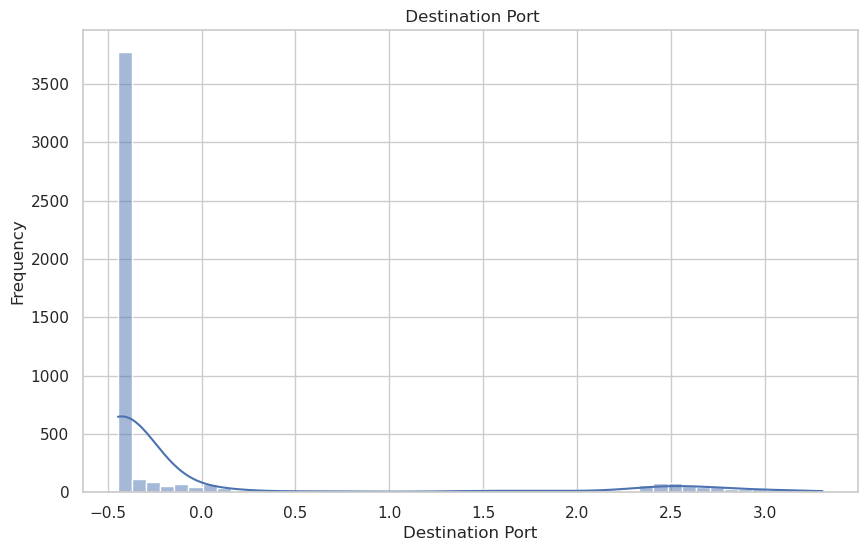

In [63]:
sns.set(style="whitegrid")
# Distribution Plot for 'Destination Port'
plt.figure(figsize=(10, 6))
sns.histplot(scaled_numeric_df['Destination Port'], bins=50, kde=True)
plt.title(' Destination Port')
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.show()

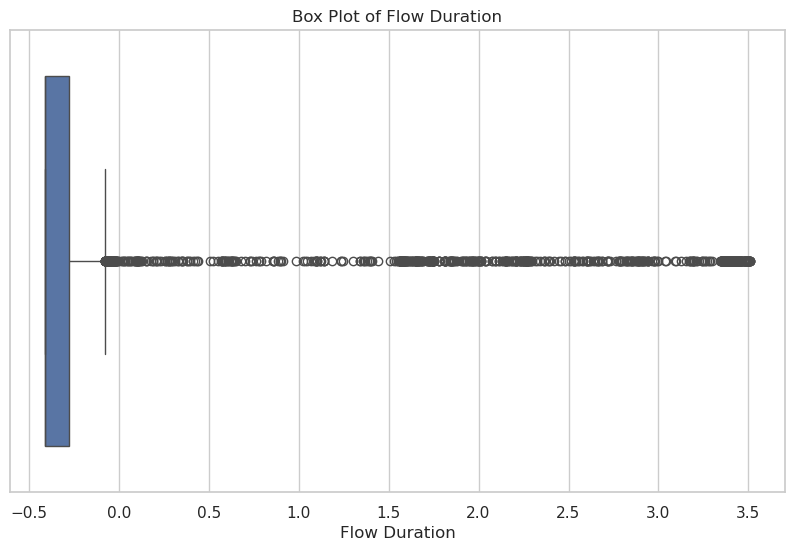

In [64]:
# Box Plot for 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.boxplot(x=scaled_numeric_df['Flow Duration'])
plt.title('Box Plot of Flow Duration')
plt.xlabel('Flow Duration')
plt.show()

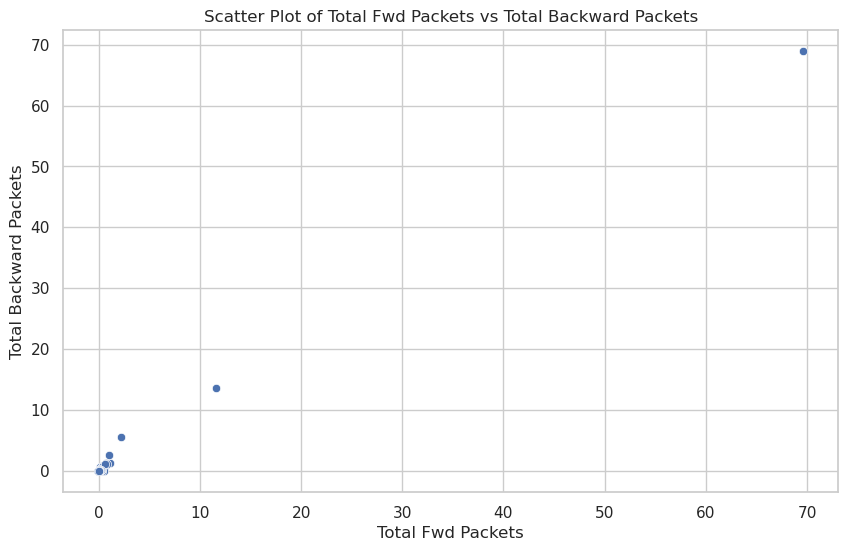

In [65]:
# Scatter Plot for 'Total Fwd Packets' vs 'Total Backward Packets'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Fwd Packets', y='Total Backward Packets', data=scaled_numeric_df)
plt.title('Scatter Plot of Total Fwd Packets vs Total Backward Packets')
plt.xlabel('Total Fwd Packets')
plt.ylabel('Total Backward Packets')
plt.show()

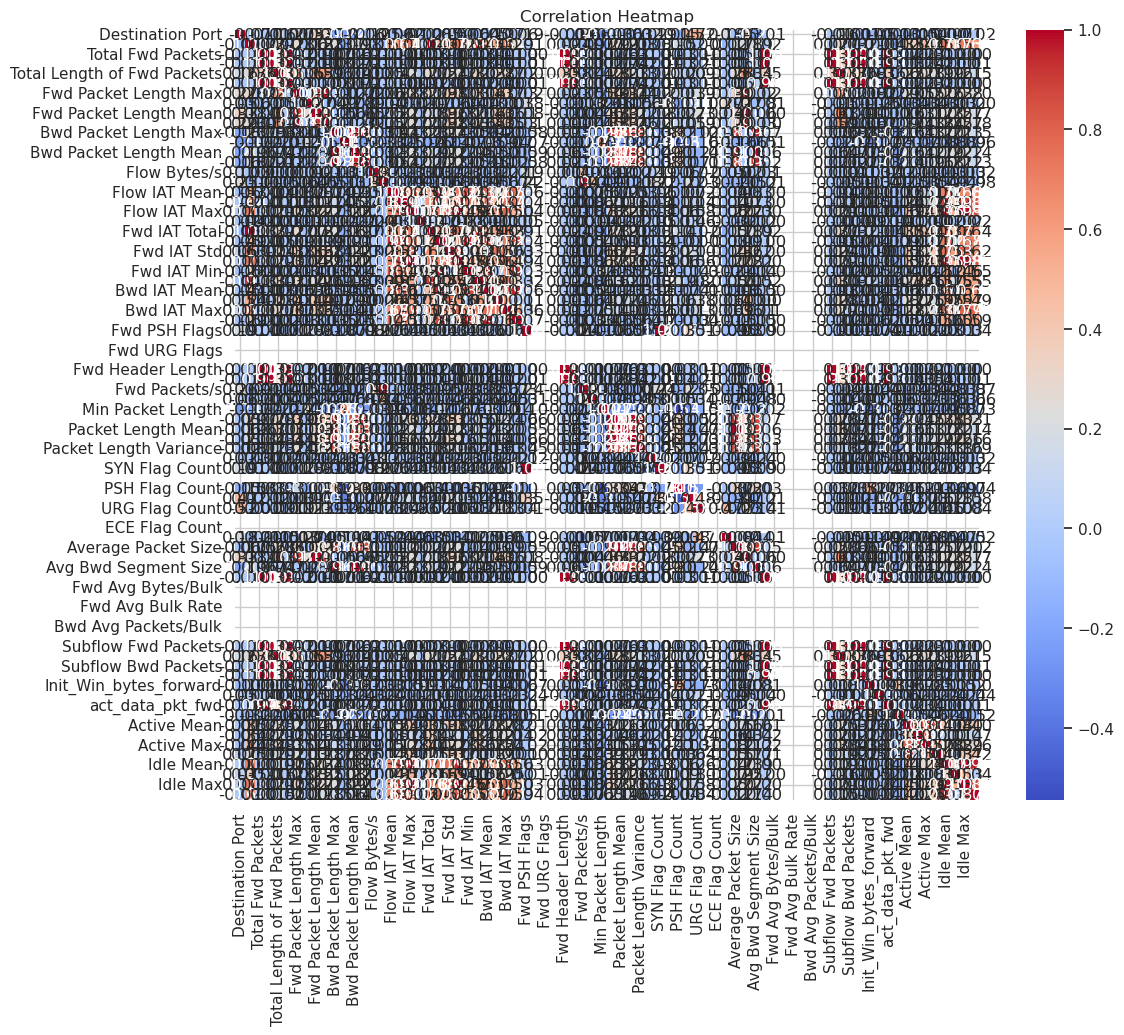

In [66]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = scaled_numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# EDA

In [67]:
### Outliers Detection
from scipy import stats
# Z-score method
z_scores = np.abs(stats.zscore(scaled_numeric_df))
outliers = (z_scores > 3)

# Display outliers
print(f"Number of outliers detected: {np.sum(outliers)}")

Number of outliers detected: Destination Port                74
Flow Duration                  235
Total Fwd Packets                2
Total Backward Packets           3
Total Length of Fwd Packets    108
                              ... 
Active Min                      82
Idle Mean                      203
Idle Std                        88
Idle Max                       207
Idle Min                       205
Length: 78, dtype: int64


In [68]:
# Define threshold for outlier detection (e.g., Z-score > 3)
threshold = 3

# Boolean array indicating outliers
outliers = (z_scores > threshold)

# Remove rows containing outliers
cleaned_data = scaled_numeric_df[~outliers.any(axis=1)]

# Display the shape of cleaned data
print(f"Shape of cleaned data after removing outliers: {cleaned_data.shape}")

Shape of cleaned data after removing outliers: (3169, 78)


In [69]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.01)

# Fit and predict anomalies on scaled_numeric_df
anomaly_pred = iso_forest.fit_predict(cleaned_data)

# Add anomaly predictions as a new column 'Anomaly' to subset_df
cleaned_data['Anomaly'] = anomaly_pred

# Filter out anomalies
anomalies = cleaned_data[cleaned_data['Anomaly'] == -1]

# Display number of anomalies detected
print(f"Number of anomalies detected: {anomalies.shape[0]}")


Number of anomalies detected: 32


/tmp/ipykernel_26814/991129381.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Anomaly'] = anomaly_pred


In [70]:
# Filter out anomalies from subset_df
cleaned_subset_df = cleaned_data[cleaned_data['Anomaly'] != -1]

# Display shape of cleaned dataset
print(f"Shape of cleaned subset_df after removing anomalies: {cleaned_subset_df.shape}")

Shape of cleaned subset_df after removing anomalies: (3137, 79)


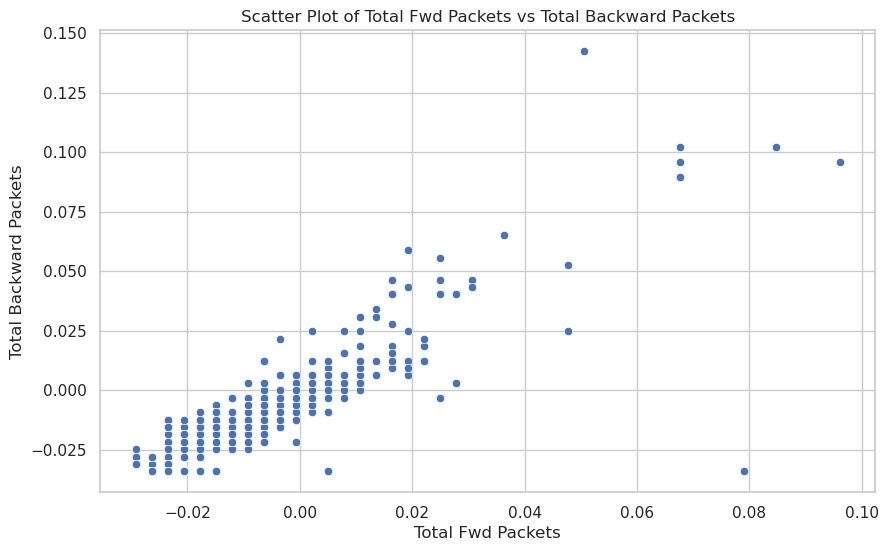

In [71]:
# Scatter Plot for 'Total Fwd Packets' vs 'Total Backward Packets'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Fwd Packets', y='Total Backward Packets', data=cleaned_subset_df)
plt.title('Scatter Plot of Total Fwd Packets vs Total Backward Packets')
plt.xlabel('Total Fwd Packets')
plt.ylabel('Total Backward Packets')
plt.show()

In [72]:
cleaned_subset_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Anomaly
0,-0.442129,-0.407478,-0.020685,-0.027817,-0.170922,-0.024128,-0.226185,0.157742,-0.156167,-0.220211,...,-0.793540,-0.184644,-0.126904,-0.189418,-0.152568,-0.332817,-0.145156,-0.334425,-0.305771,1
1,-0.419793,-0.232524,-0.006437,-0.012334,-0.079855,-0.017617,-0.052254,-0.238120,-0.114855,-0.041187,...,-0.793540,0.069166,-0.126904,-0.042931,0.134814,-0.009804,-0.145156,-0.045941,0.034141,1
3,-0.442129,-0.407817,-0.026384,-0.027817,-0.189348,-0.024055,-0.219898,0.231967,-0.133168,-0.220211,...,0.962822,-0.184644,-0.126904,-0.189418,-0.152568,-0.332817,-0.145156,-0.334425,-0.305771,1
4,-0.385887,-0.408595,-0.029233,-0.030913,-0.216278,-0.024365,-0.259714,-0.238120,-0.278826,-0.220211,...,2.133730,-0.184644,-0.126904,-0.189418,-0.152568,-0.332817,-0.145156,-0.334425,-0.305771,1
5,-0.411546,-0.408594,-0.029233,-0.030913,-0.216278,-0.024365,-0.259714,-0.238120,-0.278826,-0.220211,...,2.133730,-0.184644,-0.126904,-0.189418,-0.152568,-0.332817,-0.145156,-0.334425,-0.305771,1


In [73]:
cleaned_subset_df.shape

(3137, 79)

In [74]:
cleaned_subset_df.dtypes

Destination Port               float64
Flow Duration                  float64
Total Fwd Packets              float64
Total Backward Packets         float64
Total Length of Fwd Packets    float64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                       float64
Idle Min                       float64
Anomaly                          int64
Length: 79, dtype: object

# Data Partition

In [75]:
X = cleaned_subset_df


In [76]:
X.shape

(3137, 79)

In [77]:
y.shape

(4997,)

In [78]:
y = y[:X.shape[0]]
print("y.shape:", y.shape)

y.shape: (3137,)


In [79]:
y.value_counts()

0    2250
6     464
2     376
4      18
5      12
1       8
3       5
7       4
Name: Label, dtype: int64

In [80]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training

In [81]:
# Convert integer labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

# CNN

2024-08-05 11:50:44.952464: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/30
55/55 [==============================] - 19s 20ms/step - loss: 1.0179 - accuracy: 0.6959 - val_loss: 0.8335 - val_accuracy: 0.7289
Epoch 2/30
55/55 [==============================] - 0s 9ms/step - loss: 0.8749 - accuracy: 0.7113 - val_loss: 0.8395 - val_accuracy: 0.7289
Epoch 3/30
55/55 [==============================] - 0s 8ms/step - loss: 0.8735 - accuracy: 0.7113 - val_loss: 0.8453 - val_accuracy: 0.7289
Epoch 4/30
55/55 [==============================] - 0s 7ms/step - loss: 0.8713 - accuracy: 0.7113 - val_loss: 0.8443 - val_accuracy: 0.7289
Epoch 5/30
55/55 [==============================] - 0s 8ms/step - loss: 0.8680 - accuracy: 0.7113 - val_loss: 0.8507 - val_accuracy: 0.7289
Epoch 6/30
55/55 [==============================] - 1s 9ms/step - loss: 0.8697 - accuracy: 0.7101 - val_loss: 0.8434 - val_accuracy: 0.7289
Epoch 7/30
55/55 [==============================] - 0s 8ms/step - loss: 0.8643 - accuracy: 0.7113 - val_loss: 0.8412 - val_accuracy: 0.7289
Epoch 8/30
55/55 [

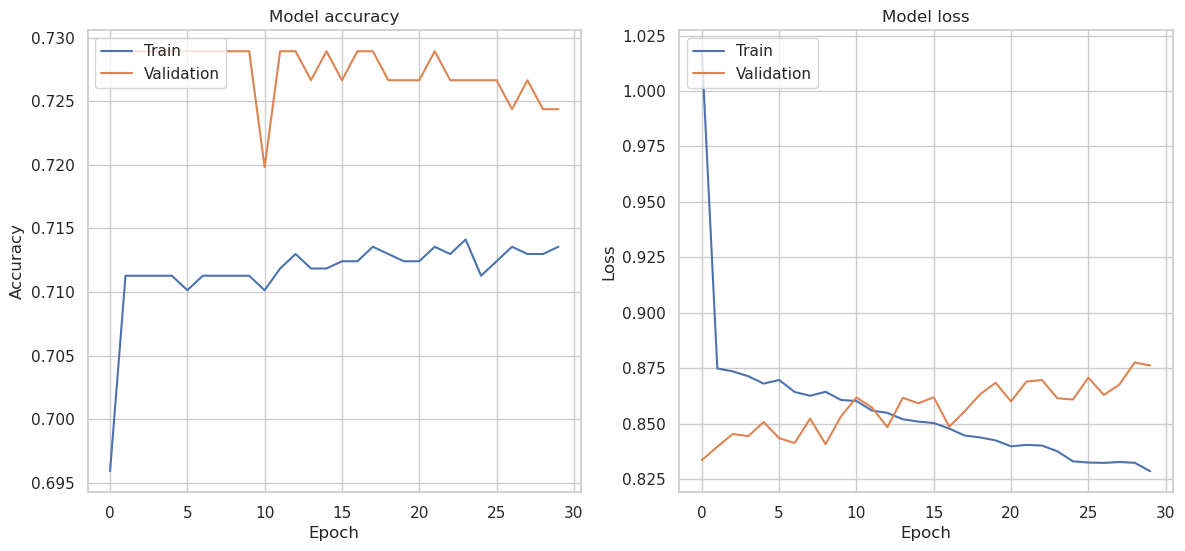

30/30 [==============================] - 0s 4ms/step
Training RMSE: 0.23524802923202515
Validation RMSE: 0.24057048559188843


In [82]:
# Reshape input data for CNN (samples, timesteps, features)
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(y_train_cat.shape[1], activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model and store the training history
history = cnn_model.fit(X_train_cnn, y_train_cat, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cat)
print(f'CNN Accuracy: {cnn_accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Calculate RMSE for training and validation
train_predictions = cnn_model.predict(X_train_cnn)
val_predictions = cnn_model.predict(X_test_cnn)

train_rmse = np.sqrt(np.mean((y_train_cat - train_predictions) ** 2))
val_rmse = np.sqrt(np.mean((y_test_cat - val_predictions) ** 2))

print(f'Training RMSE: {train_rmse}')
print(f'Validation RMSE: {val_rmse}')

# RNN

Epoch 1/50
176/176 [==============================] - 6s 7ms/step - loss: 1.1447 - accuracy: 0.6338 - val_loss: 0.8665 - val_accuracy: 0.7198
Epoch 2/50
176/176 [==============================] - 1s 3ms/step - loss: 0.8881 - accuracy: 0.7107 - val_loss: 0.8480 - val_accuracy: 0.7267
Epoch 3/50
176/176 [==============================] - 0s 3ms/step - loss: 0.8731 - accuracy: 0.7113 - val_loss: 0.8505 - val_accuracy: 0.7267
Epoch 4/50
176/176 [==============================] - 1s 3ms/step - loss: 0.8671 - accuracy: 0.7113 - val_loss: 0.8372 - val_accuracy: 0.7267
Epoch 5/50
176/176 [==============================] - 1s 3ms/step - loss: 0.8616 - accuracy: 0.7113 - val_loss: 0.8453 - val_accuracy: 0.7267
Epoch 6/50
176/176 [==============================] - 1s 4ms/step - loss: 0.8573 - accuracy: 0.7113 - val_loss: 0.8451 - val_accuracy: 0.7267
Epoch 7/50
176/176 [==============================] - 1s 3ms/step - loss: 0.8549 - accuracy: 0.7113 - val_loss: 0.8515 - val_accuracy: 0.7267
Epoch 

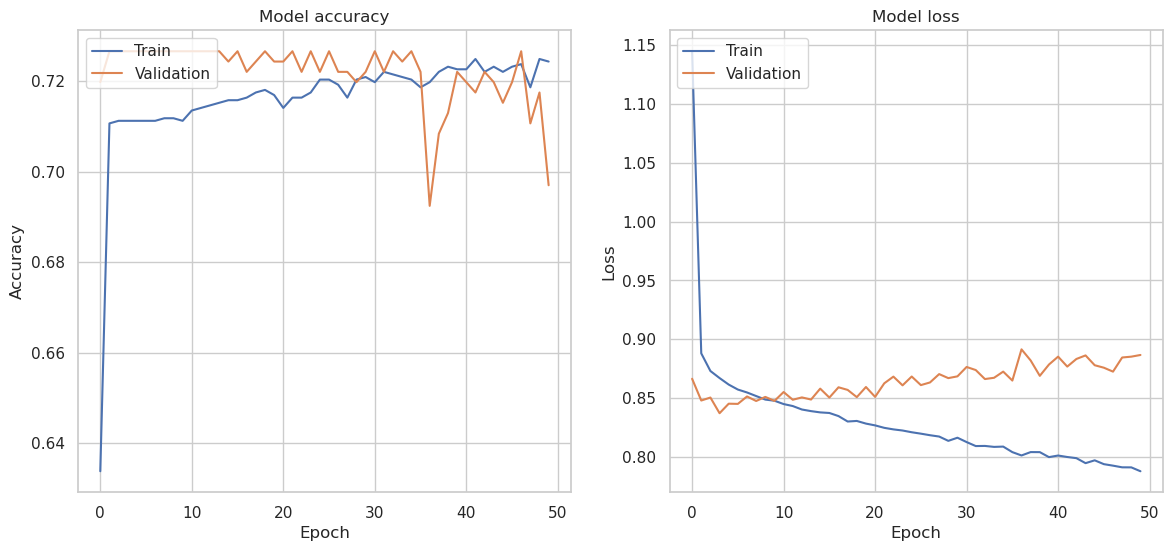

30/30 [==============================] - 0s 3ms/step
Training RMSE: 0.23182640969753265
Validation RMSE: 0.24227644503116608


In [83]:
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(1, X_train.shape[1]), activation='relu'))
rnn_model.add(Dense(y_train_cat.shape[1], activation='softmax'))

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the RNN model and store the training history
rnn_history = rnn_model.fit(X_train_rnn, y_train_cat, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test_cat)
print(f'RNN Accuracy: {rnn_accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'])
plt.plot(rnn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Calculate RMSE for training and validation
train_predictions_rnn = rnn_model.predict(X_train_rnn)
val_predictions_rnn = rnn_model.predict(X_test_rnn)

train_rmse_rnn = np.sqrt(np.mean((y_train_cat - train_predictions_rnn) ** 2))
val_rmse_rnn = np.sqrt(np.mean((y_test_cat - val_predictions_rnn) ** 2))

print(f'Training RMSE: {train_rmse_rnn}')
print(f'Validation RMSE: {val_rmse_rnn}')

# Reinforcement learning


In [84]:
import numpy as np

class Environment:
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
        self.current_state_idx = 0

    def reset(self):
        self.current_state_idx = 0
        return self.features[self.current_state_idx]

    def step(self, action):
        self.current_state_idx += 1
        if self.current_state_idx >= len(self.features):
            done = True
            next_state = None
        else:
            done = False
            next_state = self.features[self.current_state_idx]

        reward = 1 if action == self.labels[self.current_state_idx] else -1
        return next_state, reward, done

# Convert to numpy arrays
state_features = X.values.astype(int)
actions = y.values.astype(int)

# Create the environment
env = Environment(state_features, actions)

# Print state and action and their dtypes
initial_state = env.reset()
initial_action = actions[0]

print("Initial State:", initial_state)
print("State dtype:", initial_state.dtype)

print("Initial Action:", initial_action)
print("Action dtype:", initial_action.dtype)


Initial State: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1]
State dtype: int64
Initial Action: 0
Action dtype: int64


In [92]:
# import numpy as np

# class Environment:
#     def __init__(self, features, labels):
#         self.features = features
#         self.labels = labels
#         self.current_state_idx = 0

#     def reset(self):
#         self.current_state_idx = 0
#         return self.features[self.current_state_idx]

#     def step(self, action):
#         reward = 1 if action == self.labels[self.current_state_idx] else -1
#         self.current_state_idx += 1
#         if self.current_state_idx >= len(self.features):
#             done = True
#             next_state = None
#         else:
#             done = False
#             next_state = self.features[self.current_state_idx]

#         return next_state, reward, done

# # Convert to numpy arrays
# state_features = X.values.astype(int)
# actions = y.values.astype(int)

# # Create the environment
# env = Environment(state_features, actions)

# # Q-learning parameters
# n_actions = len(np.unique(actions))
# q_table = np.zeros((len(state_features), n_actions))
# alpha = 0.125
# gamma = 1.3
# epsilon = 0.6
# epochs = 85

# # Training loop
# for _ in range(epochs):
#     state = env.reset()
#     done = False
#     while not done:
#         if np.random.rand() < epsilon:
#             action = np.random.choice(n_actions)
#         else:
#             action = np.argmax(q_table[env.current_state_idx])

#         next_state, reward, done = env.step(action)
#         if next_state is not None and env.current_state_idx < len(q_table):
#             q_table[env.current_state_idx - 1, action] += alpha * (reward + gamma * np.max(q_table[env.current_state_idx]) - q_table[env.current_state_idx - 1, action])
#         elif next_state is None:
#             q_table[env.current_state_idx - 1, action] += alpha * (reward - q_table[env.current_state_idx - 1, action])

# # Calculate accuracy
# correct_predictions = sum(np.argmax(q_table, axis=1) == actions)
# accuracy = correct_predictions / len(actions)

# print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 93.00%


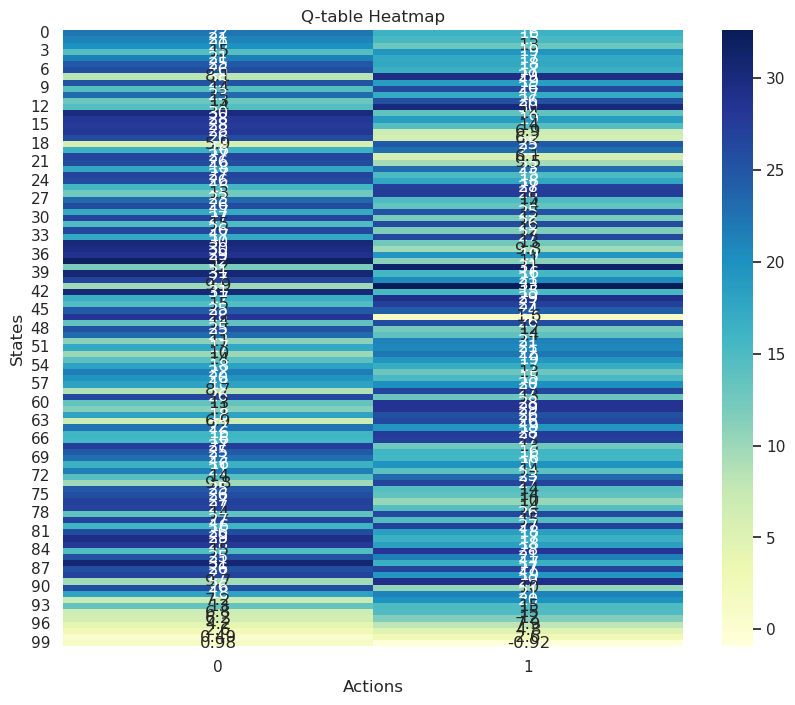

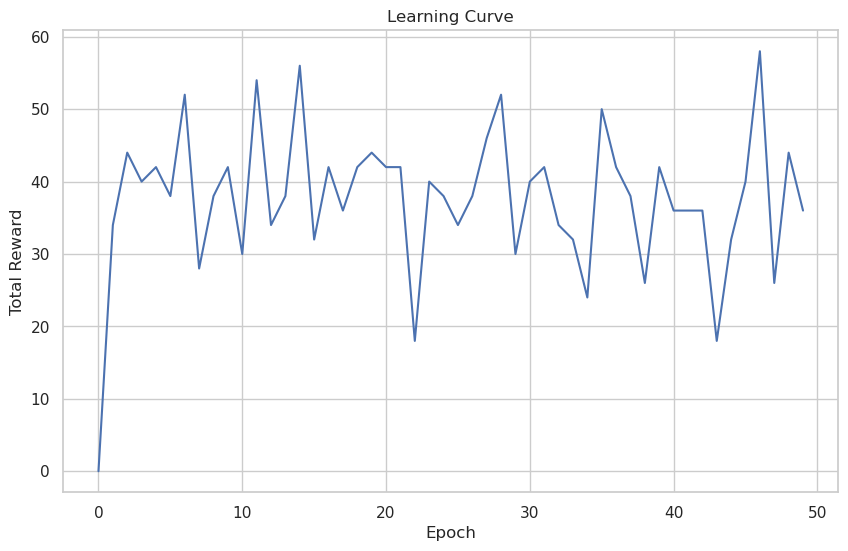

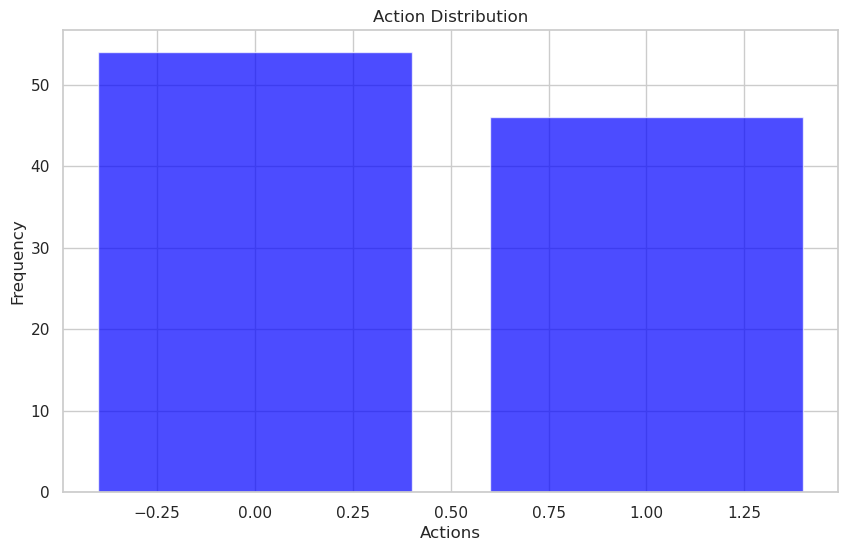

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class Environment:
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
        self.current_state_idx = 0

    def reset(self):
        self.current_state_idx = 0
        return self.features[self.current_state_idx]

    def step(self, action):
        reward = 1 if action == self.labels[self.current_state_idx] else -1
        self.current_state_idx += 1
        if self.current_state_idx >= len(self.features):
            done = True
            next_state = None
        else:
            done = False
            next_state = self.features[self.current_state_idx]

        return next_state, reward, done

# Convert to numpy arrays
# Assume X and y are your input features and labels respectively
# Replace the following lines with your data loading code
X = np.random.randint(0, 2, (100, 10))  # Example features
y = np.random.randint(0, 2, 100)        # Example labels
state_features = X.astype(int)
actions = y.astype(int)

# Create the environment
env = Environment(state_features, actions)

# Q-learning parameters
n_actions = len(np.unique(actions))
q_table = np.zeros((len(state_features), n_actions))
alpha = 0.125
gamma = 1.7
epsilon = 0.6
epochs = 50

# Initialize a list to store the total reward per epoch
rewards_per_epoch = []

# Training loop
for _ in range(epochs):
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        if np.random.rand() < epsilon:
            action = np.random.choice(n_actions)
        else:
            action = np.argmax(q_table[env.current_state_idx])

        next_state, reward, done = env.step(action)
        total_reward += reward
        if next_state is not None and env.current_state_idx < len(q_table):
            q_table[env.current_state_idx - 1, action] += alpha * (reward + gamma * np.max(q_table[env.current_state_idx]) - q_table[env.current_state_idx - 1, action])
        elif next_state is None:
            q_table[env.current_state_idx - 1, action] += alpha * (reward - q_table[env.current_state_idx - 1, action])

    rewards_per_epoch.append(total_reward)

# Calculate accuracy
correct_predictions = sum(np.argmax(q_table, axis=1) == actions)
accuracy = correct_predictions / len(actions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Q-table heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(q_table, annot=True, cmap="YlGnBu")
plt.title("Q-table Heatmap")
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(rewards_per_epoch)
plt.title("Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Total Reward")
plt.show()

# Calculate the frequency of each action taken
actions_taken = np.argmax(q_table, axis=1)
unique, counts = np.unique(actions_taken, return_counts=True)

# Plot the action distribution
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='blue', alpha=0.7)
plt.title("Action Distribution")
plt.xlabel("Actions")
plt.ylabel("Frequency")
plt.show()


In [87]:
# Create a dictionary to encapsulate the environment, Q-table, and rewards
import boto3, joblib, os
reinforcement_model = {
    'environment': env,
    'q_table': q_table,
    'rewards_per_epoch': rewards_per_epoch
}

# Save the entire model to a file using joblib
joblib.dump(reinforcement_model, 'reinforcement_model.pkl')

# Initialize S3 client
s3 = boto3.client('s3')

# Define your bucket name
bucket_name = 'mybuc143'

# Function to upload a file to S3
def upload_to_s3(file_name, bucket, object_name=None):
    if object_name is None:
        object_name = os.path.basename(file_name)
    
    try:
        response = s3.upload_file(file_name, bucket, object_name)
    except Exception as e:
        print(f"Error uploading {file_name}: {e}")
    else:
        print(f"Successfully uploaded {file_name} to {bucket}/{object_name}")

# Upload the model to S3
upload_to_s3('reinforcement_model.pkl', bucket_name, 'models/reinforcement_model.pkl')

# Clean up local file if needed
os.remove('reinforcement_model.pkl')

Successfully uploaded reinforcement_model.pkl to mybuc143/models/reinforcement_model.pkl


In [88]:
# Create a dictionary to encapsulate the environment, Q-table, and rewards
import boto3, joblib

# Save the entire model to a file using joblib
joblib.dump(cnn_model, 'cnn_model.pkl')

# Initialize S3 client
s3 = boto3.client('s3')

# Define your bucket name
bucket_name = 'mybuc143'

# Function to upload a file to S3
def upload_to_s3(file_name, bucket, object_name=None):
    if object_name is None:
        object_name = os.path.basename(file_name)
    
    try:
        response = s3.upload_file(file_name, bucket, object_name)
    except Exception as e:
        print(f"Error uploading {file_name}: {e}")
    else:
        print(f"Successfully uploaded {file_name} to {bucket}/{object_name}")

# Upload the model to S3
upload_to_s3('cnn_model.pkl', bucket_name, 'models/cnn_model.pkl')

# Clean up local file if needed
os.remove('cnn_model.pkl')

Successfully uploaded cnn_model.pkl to mybuc143/models/cnn_model.pkl


In [89]:
# Create a dictionary to encapsulate the environment, Q-table, and rewards
import boto3, joblib

# Save the entire model to a file using joblib
joblib.dump(cnn_model, 'rnn_model.pkl')

# Initialize S3 client
s3 = boto3.client('s3')

# Define your bucket name
bucket_name = 'mybuc143'

# Function to upload a file to S3
def upload_to_s3(file_name, bucket, object_name=None):
    if object_name is None:
        object_name = os.path.basename(file_name)
    
    try:
        response = s3.upload_file(file_name, bucket, object_name)
    except Exception as e:
        print(f"Error uploading {file_name}: {e}")
    else:
        print(f"Successfully uploaded {file_name} to {bucket}/{object_name}")

# Upload the model to S3
upload_to_s3('rnn_model.pkl', bucket_name, 'models/rnn_model.pkl')

# Clean up local file if needed
os.remove('rnn_model.pkl')

Successfully uploaded rnn_model.pkl to mybuc143/models/rnn_model.pkl


In [90]:
def predict(state):
    action = np.argmax(q_table[state])
    return action

# Example predictions
example_states = [0, 1, 2] 
for state in example_states:
    action = predict(state)
    print(f"Predicted action for state {state}: {action}")

Predicted action for state 0: 0
Predicted action for state 1: 0
Predicted action for state 2: 0
